<a href="https://colab.research.google.com/github/Pittawas6330210206/bsc_dpdm22/blob/main/Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
import matplotlib.pyplot as plt

8


<Figure size 432x288 with 0 Axes>

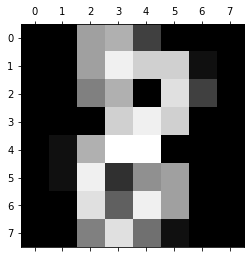

In [4]:
ind = 28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

# Quiz 3 march 
- แบ่ง data ออกเป็น 80(train) 20(test) โดยใช้ random_state = เลขกลุ่ม shuffle = true
- หา parameters ที่ดีที่สุด (K (1,3,5) Distance_weighted (yes/no)) ด้วย 10-fold-cross-validation
- test parameters ที่ดีที่สุด กับ test data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=3, shuffle=True)

In [7]:
X = digits['data']
y = digits['target']

In [8]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
import pandas as pd

In [11]:
columns = digits['feature_names']
X_df = pd.DataFrame(X, columns=columns) 

In [12]:
X_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [13]:
X_df['label'] = y
X_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [14]:
shuffled_df = X_df.sample(frac=1, random_state=3)
shuffled_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
266,0.0,0.0,4.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,15.0,11.0,2.0,0.0,0.0,0
356,0.0,0.0,2.0,15.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,5.0,0.0,0.0,0.0,4
221,0.0,0.0,0.0,4.0,14.0,14.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,14.0,15.0,6.0,0.0,1
1241,0.0,1.0,13.0,16.0,16.0,5.0,0.0,0.0,0.0,7.0,...,0.0,0.0,1.0,15.0,16.0,16.0,15.0,3.0,0.0,2
642,0.0,0.0,4.0,14.0,14.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,14.0,14.0,6.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.0,0.0,2.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,16.0,15.0,5.0,0.0,6
952,0.0,0.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,7.0,16.0,16.0,16.0,16.0,14.0,1
1667,0.0,0.0,8.0,12.0,12.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,5.0,13.0,11.0,4.0,0.0,0.0,0
1273,0.0,2.0,13.0,16.0,16.0,10.0,0.0,0.0,2.0,15.0,...,1.0,0.0,2.0,15.0,16.0,16.0,12.0,12.0,1.0,2


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# Load the digits dataset
digits = load_digits()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=3, shuffle=True)

# Define the hyperparameters to test
n_neighbors = [1, 3, 5]
weights = ['uniform', 'distance']

# Initialize variables to keep track of the best hyperparameters and the highest cross-validation score
best_params = None
best_score = 0

# Test each combination of hyperparameters
for n in n_neighbors:
    for w in weights:
        # Create a KNN classifier object with the current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n, weights=w)
        
        # Calculate the average cross-validation score for this combination of hyperparameters
        scores = cross_val_score(knn, X_train, y_train, cv=10)
        avg_score = scores.mean()
        
        # Check if this combination of hyperparameters is better than the previous best
        if avg_score > best_score:
            best_score = avg_score
            best_params = {'n_neighbors': n, 'weights': w}

# Print the best hyperparameters and the corresponding cross-validation score
print('Best hyperparameters:', best_params)
print('Cross-validation score:', best_score)

# Create a KNN classifier object with the best hyperparameters and fit it to the training data
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(X_train, y_train)

# Calculate the accuracy score on the test data
test_score = best_knn.score(X_test, y_test)
print('Test accuracy score:', test_score)

Best hyperparameters: {'n_neighbors': 1, 'weights': 'uniform'}
Cross-validation score: 0.9867618492618492
Test accuracy score: 0.9888888888888889


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np